# 데이콘 Basic: 항공사 고객 만족도 예측 대회
---
항공사의 만족도 조사 정보들을 담은 데이터를 이용하여 응답자의 만족 여부를 예측

## 01 데이터 로드 및 확인
### 01-1) 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('train.csv')

data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [3]:
test_data = pd.read_csv('test.csv')
id = test_data['id']
test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,...,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,...,4,4,3,1,2,5,4,4,0,0.0


### 01-2) 데이터 정보 및 결측치 확인

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [5]:
data.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

확인 결과, 결측지가 존재하지 않습니다.

### 01-3) 기초 통계 분석

In [6]:
#기초 통계량
data.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [7]:
# 데이터 타입
data.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

## 02 데이터 시각화
### 02-1) feature 분포 시각화

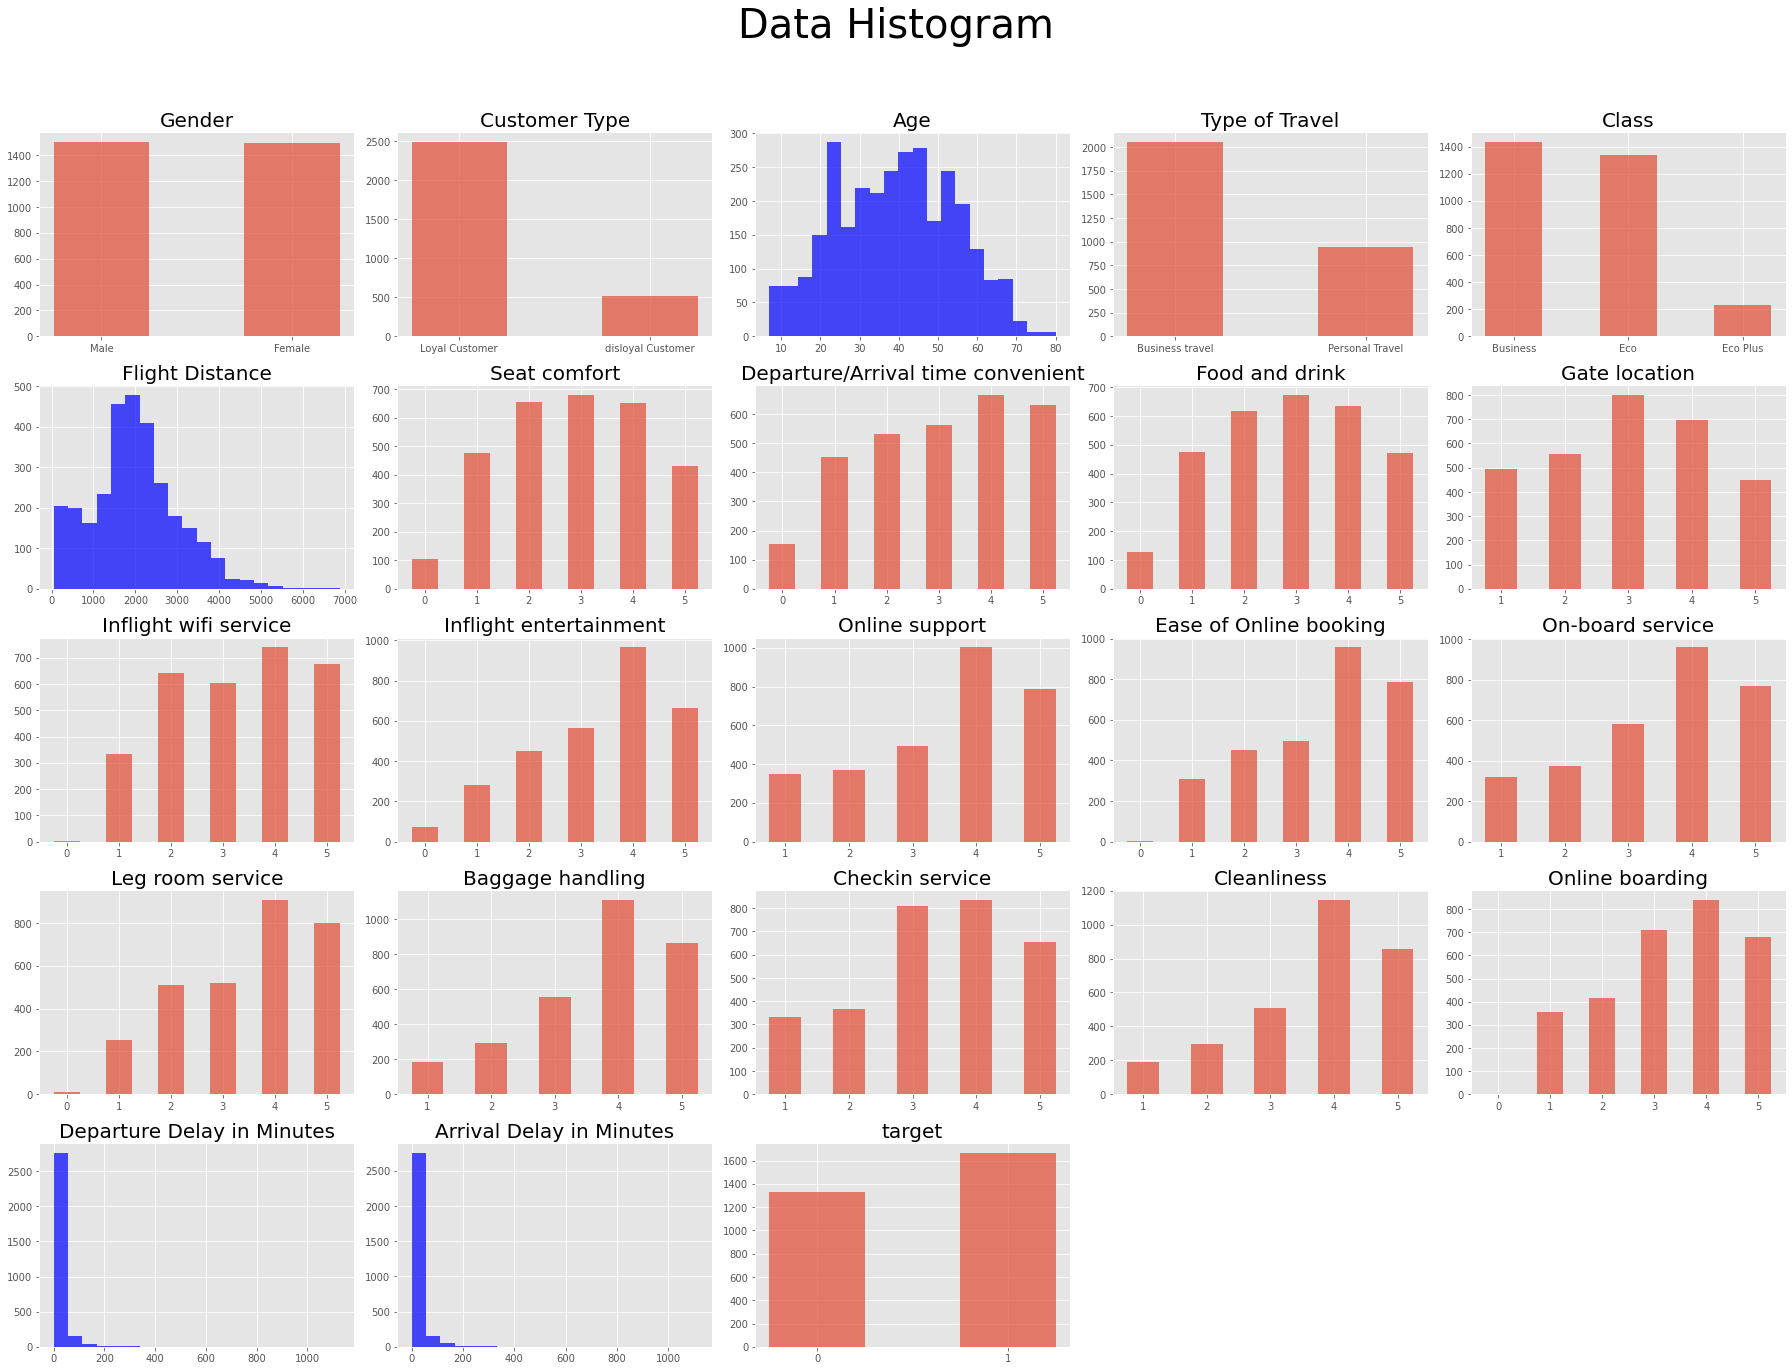

In [8]:
plt.style.use('ggplot')

plt.figure(figsize=(25,20))
plt.suptitle('Data Histogram', fontsize=40)

# id 제외
cols = data.columns[1:]
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Departure Delay in Minutes와 Arrival Delay in Minutes의 값들이 왼쪽으로 치우쳐 있음을 확인할 수 있습니다.

### 02-2) target과 feature의 관계 확인 - 범주형 변수

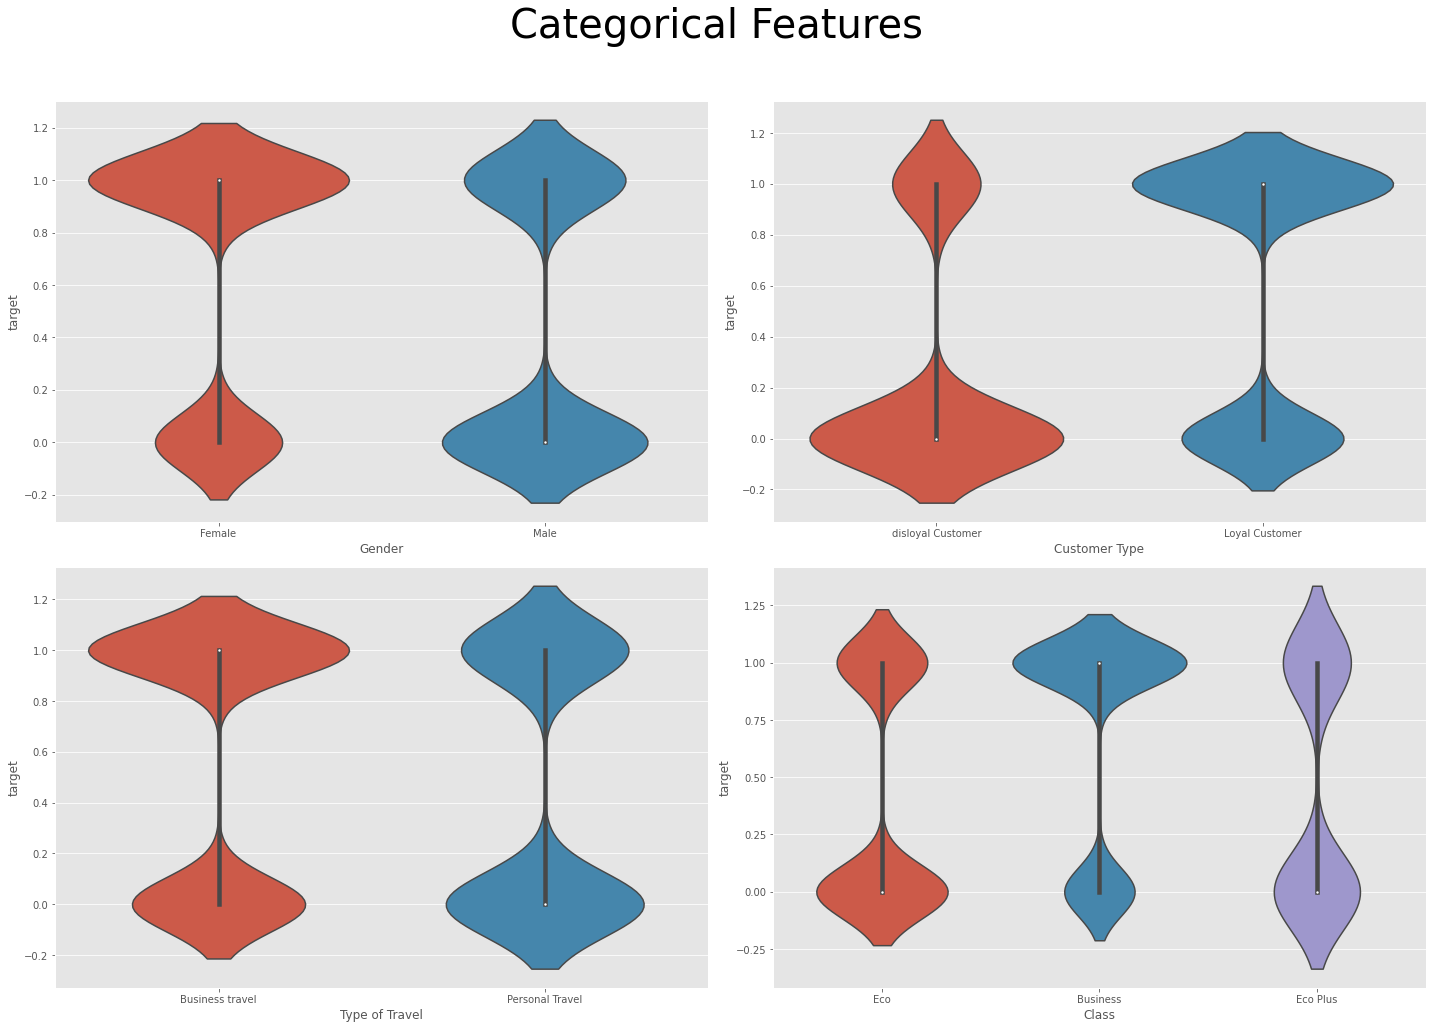

In [9]:
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle('Categorical Features', fontsize=40)

for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel('target')
    sns.violinplot(x=data[categorical_feature[i]], y=data['target'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Customer Type이 disloyal인지 loyal인지에 따라 만족도 차이가 있음을 확인할 수 있습니다.

### 02-3) target과 feature의 관계 - 수치형 변수

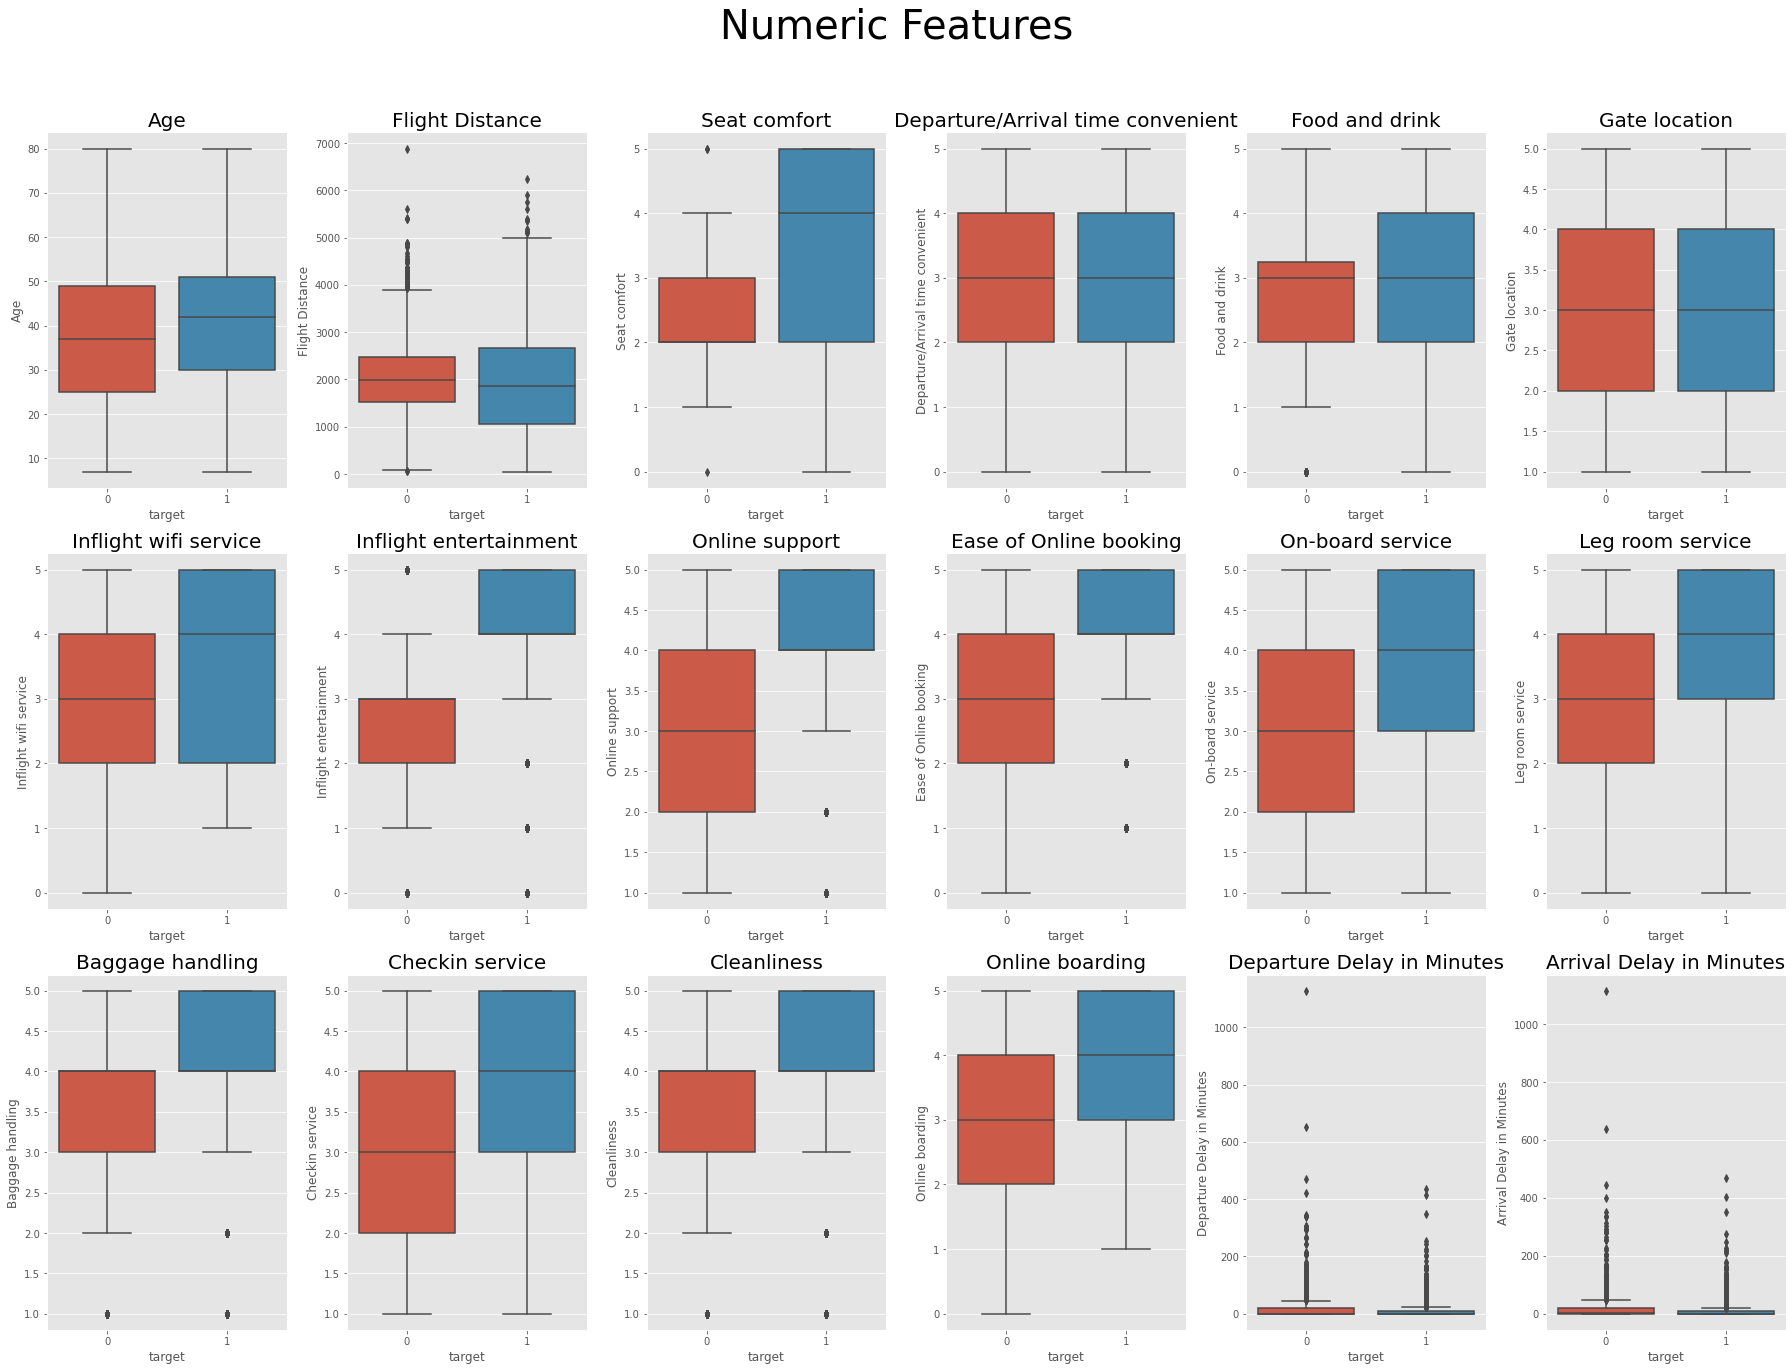

In [10]:
numeric_feature = data.columns[(data.dtypes=='int64')|(data.dtypes=='float')]
num_data = data[numeric_feature]

fig,axes = plt.subplots(3,6,figsize=(25,20))

fig.suptitle('Numeric Features', fontsize=40)

#id 제외
for ax, col in zip(axes.flat, num_data.columns[1:-1]):
    sns.boxplot(x='target', y=col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Departure/Arrival time conveninet, Gate location은 target에 영향을 거의 미치지 않음을 확인할 수 있습니다. (이후 분석에서 제거)
- Departure Delay in Minutes와 Arrival Delay in Minutes의 경우 이상치가 많음을 확인할 수 있습니다.

### 02-4) 상관관계 시각화

In [11]:
#테스트 형식의 데이터를 숫자로 변환

corr_df = data.copy()
corr_df.drop('id', axis=1, inplace=True)
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

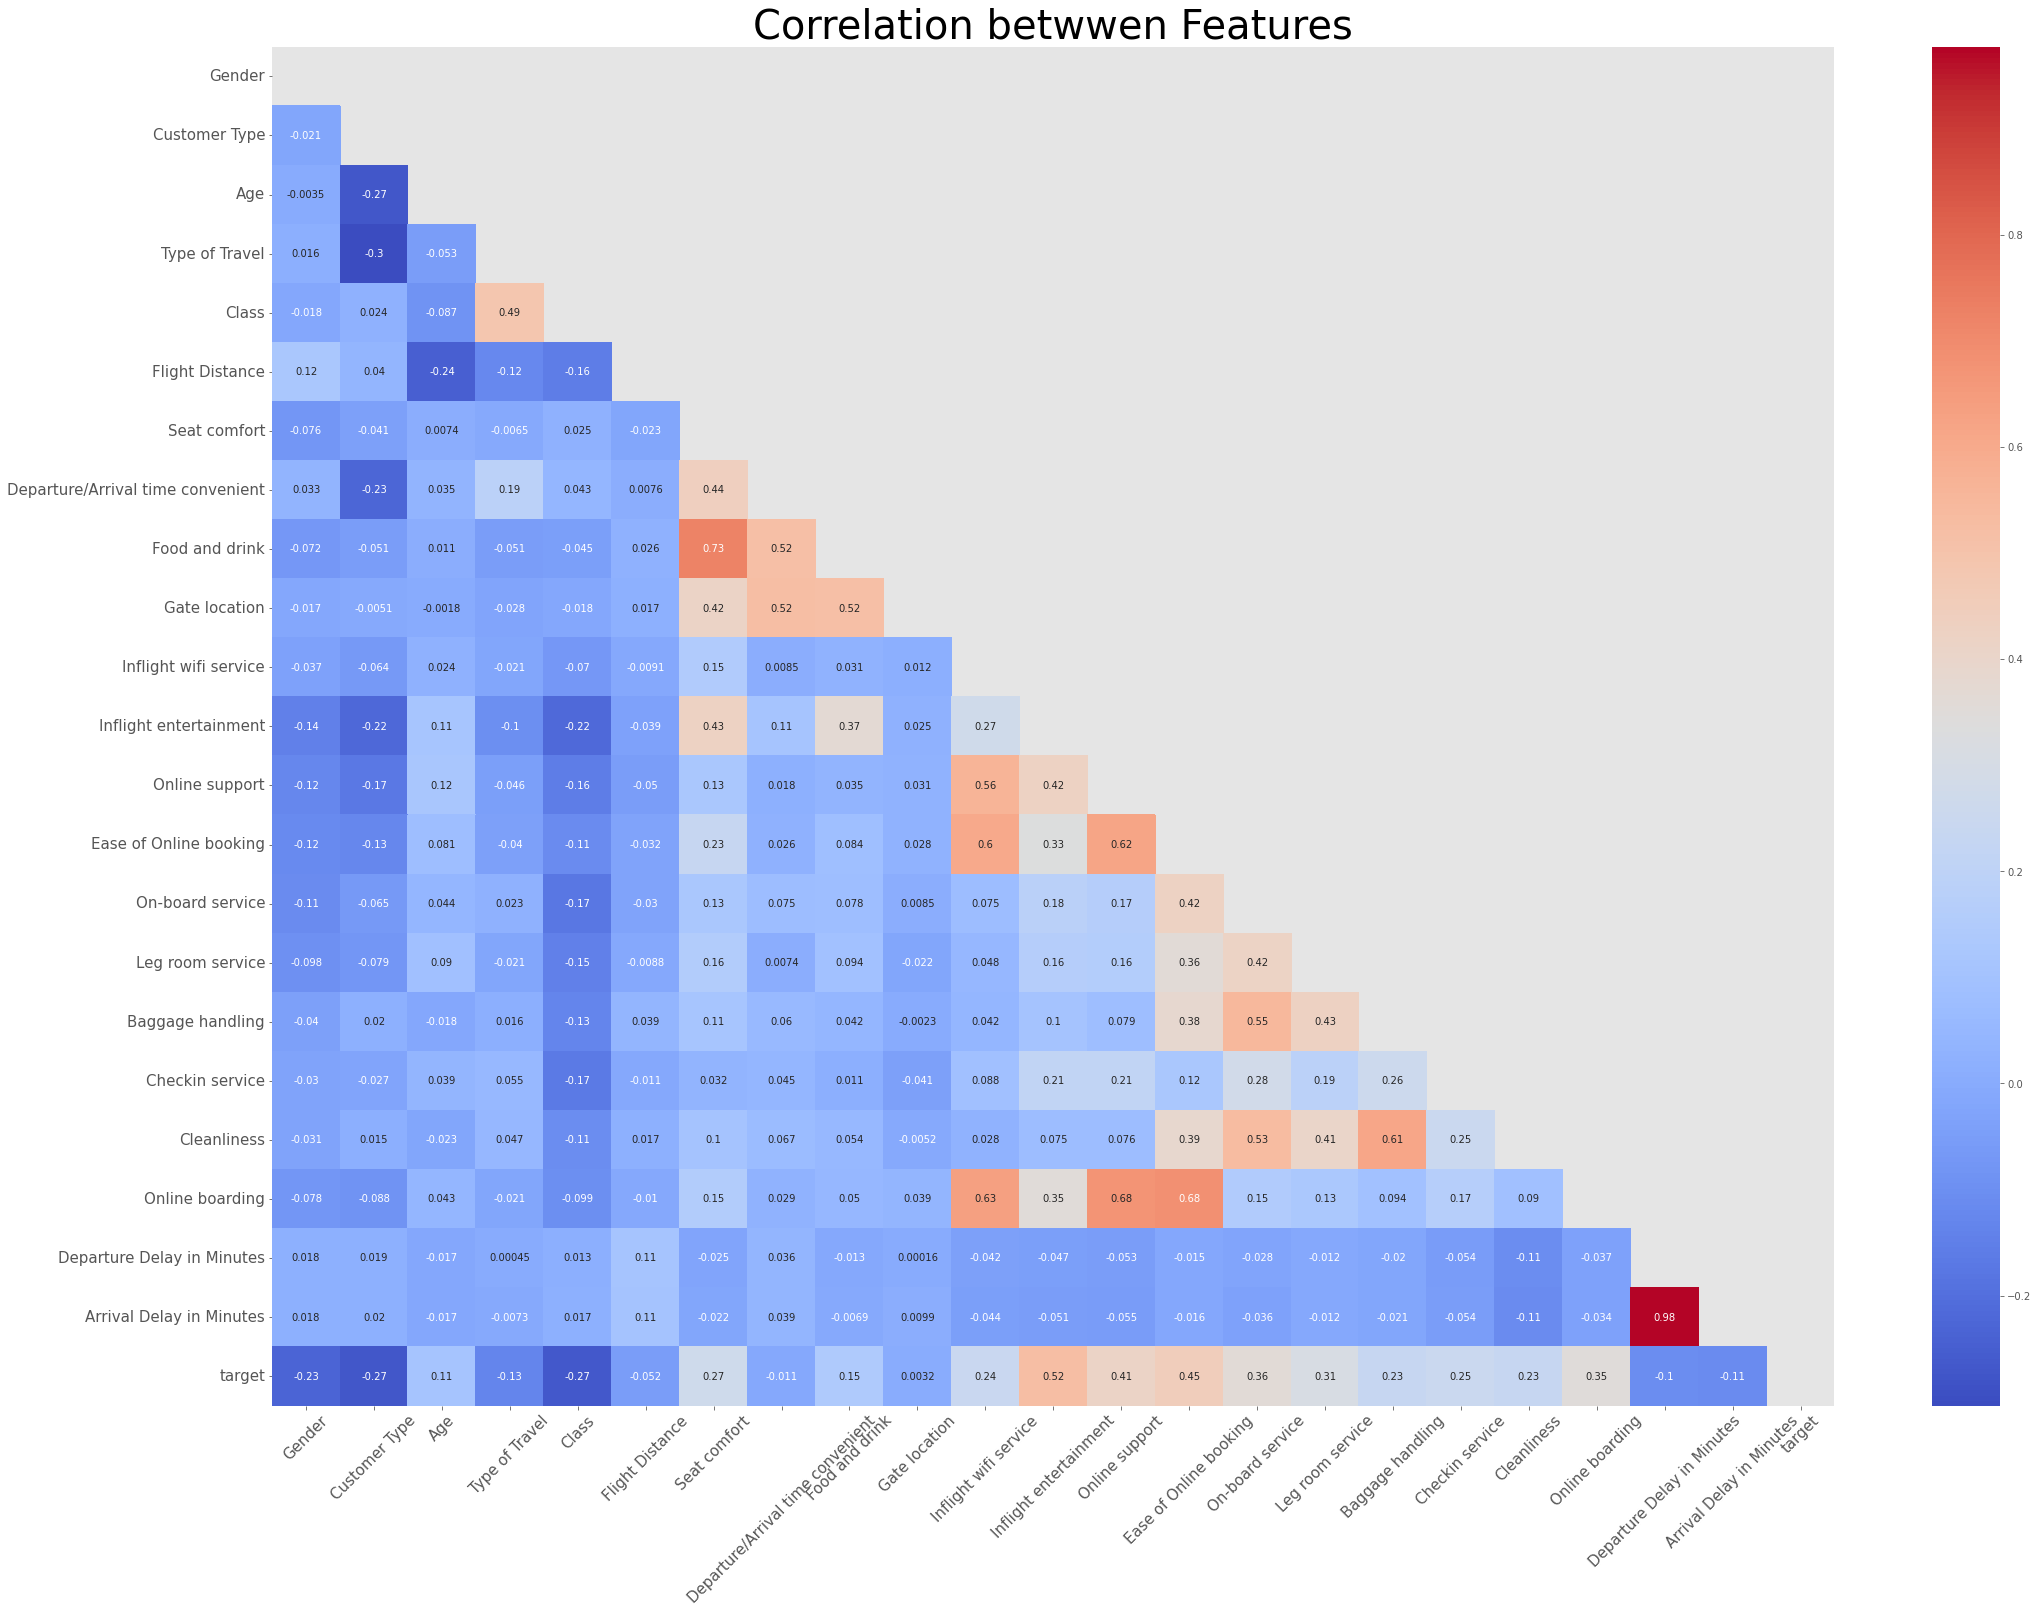

In [12]:
#상관관계 분석도

plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('Correlation betwwen Features', fontsize=40)
plt.show()

- target은 Inflight entertainment와 가장 높은 상관(0.52)을 보입니다.
- 이외에도 Online Support, Ease of Online booking, On-board service와도 높은 상관을 보입니다.
- Departure Delay in Minutes와 Arrival Delay in Minutes는 서로 매우 높은 상관(0.98)을 보입니다. (주의 필요)

## 03 데이터 전처리
### 03-1) 데이터 제거

In [13]:
def drop_features(data):
    data.drop(['id', 'Departure/Arrival time convenient','Gate location', 'Departure Delay in Minutes'], axis=1, inplace=True)
    return data

#### id
- id는 학습에 필요하지 않으므로 삭제하였습니다.

#### Departure Delay in Minutes와 Arrival Delay in Minutes
- Departure Delay in Minutes와 Arrival Delay in Minutes는 서로 매우 높은 상관(0.98)을 보입니다.
- 출발 시간이 지연되면 자연스럽게 도착 시간도 지연될 확률이 높기 때문입니다.
- 따라서, Departure Delay in Minutes를 삭제하였습니다.

#### Departure/Arrival time convenient와 Gate location
- 02-3)에서 두 feature과 target에 미치는 영향이 거의 없음을 확인하였습니다.
- 따라서, 삭제하였습니다.

### 03-2) 인코딩

In [14]:
def encode_features(data):
    features=['Gender', 'Customer Type', 'Type of Travel', 'Class']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
        
    return data

In [15]:
data = drop_features(data)
data = encode_features(data)

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,0,1,22,0,1,1599,3,3,4,3,4,4,5,4,4,4,5,4,0.0,0
1,0,0,37,0,0,2810,2,4,1,4,3,5,5,4,2,1,5,2,18.0,0
2,1,0,46,0,0,2622,1,1,4,5,5,4,4,4,4,5,4,3,0.0,1
3,0,1,24,0,1,2348,3,3,3,3,3,3,2,4,5,3,4,3,2.0,0
4,0,0,58,0,0,105,3,3,4,4,5,4,4,4,4,4,4,5,0.0,1


In [16]:
test_data = drop_features(test_data)
test_data = encode_features(test_data)

test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,0,0,61,1,1,2037,1,1,3,5,5,5,5,5,5,3,5,3,58.0
1,0,1,27,0,0,1846,1,1,1,1,1,1,3,4,5,4,4,1,0.0
2,0,0,52,0,0,1622,4,4,4,3,4,5,5,5,5,4,5,3,0.0
3,1,0,54,0,0,3534,4,4,5,4,5,2,2,2,2,5,2,1,0.0
4,0,0,41,0,1,1471,4,3,4,4,4,4,3,1,2,5,4,4,0.0


### 03-3) Arrival Delay in Minutes

In [17]:
data[['Arrival Delay in Minutes']].describe()

,Arrival Delay in Minutes
count,3000.000000
mean,15.922000
std,45.203411
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1115.000000


In [18]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(lambda x: 0 if x > 0 else 1)
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].apply(lambda x: 0 if x > 0 else 1)

- 02-1)에서 Arrival Delay in Minutes의 값들이 왼쪽으로 치우쳐 있는 것을 확인하였습니다.
- 그리고 기초 통계량을 다시 확인한 결과 다수의 값들이 0임을 확인할 수 있습니다.
- 지연 시간(분)보다 지연 여부가 만족도에 미치는 영향을 분석하는 것이 나을 것이라고 판단하였고
- 지연 시간(분)이 0인 경우와 아닌 경우로 나누어 값을 0과 1로 변경하였습니다.

### 03-4) Flight Distance와 Age

In [19]:
def distance_cat(data):
    for idx, distance in enumerate(data['Flight Distance'].values):
        if distance < 1000: data['Flight Distance'][idx] = 4
        elif distance < 2000: data['Flight Distance'][idx] = 3
        elif distance < 3000: data['Flight Distance'][idx] = 2
        elif distance < 4000: data['Flight Distance'][idx] = 1
        else: data['Flight Distance'][idx] = 0
        
    return data

data = distance_cat(data)
test_data = distance_cat(test_data)

C:\Users\Nayoun Kim\anaconda3\envs\practice\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Nayoun Kim\anaconda3\envs\practice\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Nayoun Kim\anaconda3\envs\practice\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
# def age_cat(data):
#     for idx, age in enumerate(data['Age'].values):
#         if age < 10: data['Age'][idx] = 0
#         elif age < 20: data['Age'][idx] = 10
#         elif age < 30: data['Age'][idx] = 20
#         elif age < 40: data['Age'][idx] = 30
#         elif age < 50: data['Age'][idx] = 40
#         elif age < 60: data['Age'][idx] = 50
#         elif age < 70: data['Age'][idx] = 60
#         else: data['Age'][idx] = 70
            
#         return data
            
# data = age_cat(data)
# test_data = age_cat(test_data)

- Flight Distance와 Age의 값들이 다른 feature의 값들에 비해 크기가 크기 때문에 구간별로 값을 변경하였습니다.
- 그러나, Age의 경우 변경 전과 후가 정확도에 미치는 영향이 미미하여 주석 처리하였습니다.

In [21]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,0,1,22,0,1,3,3,3,4,3,4,4,5,4,4,4,5,4,1,0
1,0,0,37,0,0,2,2,4,1,4,3,5,5,4,2,1,5,2,0,0
2,1,0,46,0,0,2,1,1,4,5,5,4,4,4,4,5,4,3,1,1
3,0,1,24,0,1,2,3,3,3,3,3,3,2,4,5,3,4,3,0,0
4,0,0,58,0,0,4,3,3,4,4,5,4,4,4,4,4,4,5,1,1


In [22]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,0,0,61,1,1,2,1,1,3,5,5,5,5,5,5,3,5,3,0
1,0,1,27,0,0,3,1,1,1,1,1,1,3,4,5,4,4,1,1
2,0,0,52,0,0,3,4,4,4,3,4,5,5,5,5,4,5,3,1
3,1,0,54,0,0,1,4,4,5,4,5,2,2,2,2,5,2,1,1
4,0,0,41,0,1,3,4,3,4,4,4,4,3,1,2,5,4,4,1


## 04 데이터 분석

### 04-1) 모델 생성
- 정확도를 높이기 위해 앙상블 모델을 사용하였습니다.
- 그리고 보다 생산적인 모델을 만들기 위해 pycaret을 사용하였습니다.

In [23]:
from pycaret.classification import *

In [24]:
clf = setup(data=data,
           silent=True,
           target='target')

,Description,Value
0,session_id,5829
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 20)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


### 04-2) 모델 비교

In [25]:
best = compare_models(n_select=3, fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9343,0.9810,0.9373,0.9441,0.9405,0.8670,0.8675,0.3970
catboost,CatBoost Classifier,0.9319,0.9823,0.9416,0.9367,0.9388,0.8619,0.8628,1.0330
lightgbm,Light Gradient Boosting Machine,0.9252,0.9819,0.9296,0.9358,0.9324,0.8487,0.8493,0.1330
gbc,Gradient Boosting Classifier,0.9190,0.9745,0.9313,0.9235,0.9271,0.8359,0.8366,0.2570
rf,Random Forest Classifier,0.9171,0.9740,0.9296,0.9221,0.9256,0.8320,0.8327,0.3530
et,Extra Trees Classifier,0.9147,0.9761,0.9270,0.9203,0.9234,0.8272,0.8277,0.3950
lr,Logistic Regression,0.8909,0.9547,0.8935,0.9086,0.9009,0.7795,0.7799,1.1010
ridge,Ridge Classifier,0.8880,0.0000,0.8910,0.9059,0.8983,0.7738,0.7742,0.0170
lda,Linear Discriminant Analysis,0.8880,0.9542,0.8918,0.9053,0.8984,0.7737,0.7741,0.0450
dt,Decision Tree Classifier,0.8852,0.8824,0.9073,0.8886,0.8976,0.7670,0.7677,0.0180


In [26]:
best

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=-1,
               num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=5829, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='auto',
               use_label_encoder=True, validate_parameters=1, verbosity=0),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_

- 상위 3개의 모델을 선정하였습니다.
- XGBClassifier, catboost, LGMBClassifier

### 04-3) 모델 최적화 및 예측

In [27]:
blend_3_soft = blend_models(estimator_list=best, method='soft', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,0.9879,0.9397,0.9397,0.9397,0.8652,0.8652
1,0.9524,0.9919,0.9483,0.9649,0.9565,0.9039,0.9041
2,0.9143,0.9789,0.9138,0.9298,0.9217,0.8270,0.8272
3,0.9238,0.9773,0.8879,0.9717,0.9279,0.8475,0.8513
4,0.9048,0.9756,0.9316,0.9008,0.9160,0.8061,0.8068
5,0.9381,0.9840,0.9487,0.9407,0.9447,0.8744,0.8745
6,0.9429,0.9868,0.9487,0.9487,0.9487,0.8842,0.8842
7,0.9190,0.9848,0.9231,0.9310,0.9270,0.8361,0.8362
8,0.9571,0.9839,0.9573,0.9655,0.9614,0.9132,0.9133
9,0.9378,0.9835,0.9569,0.9328,0.9447,0.8737,0.8740


In [28]:
final_blend_3_soft = finalize_model(blend_3_soft)
prediction = predict_model(final_blend_3_soft, data=test_data)

## 파일 제출

In [29]:
submission = pd.read_csv("sample_submission.csv")

In [30]:
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [31]:
submission['target'] = prediction['Label']
submission.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [32]:
submission.to_csv('submission3.csv', index=False)